# Data Science & Business Analytics intern at The Sparks Foundation


### Swanand Dongare

# Task 1 : Prediction Using Supervised ML


## Problem Statement :

### Predict the percentage of an student based on the no. of study hours.


1. Algorithm Type: Supervised
2. Language Used: Python
3. Algorithm Used: Linear Regression

# Importing librarys

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# reading data

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print('.....Data  read sucessfully.....')

.....Data  read sucessfully.....


# analysing data

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
data.shape

(25, 2)

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.sort_values(by=['Scores','Hours'],ascending= True, inplace=False)

,Hours,Scores
14,1.1,17
5,1.5,20
0,2.5,21
17,1.9,24
9,2.7,25
2,3.2,27
16,2.5,30
20,2.7,30
4,3.5,30
22,3.8,35


# visualising data using plots

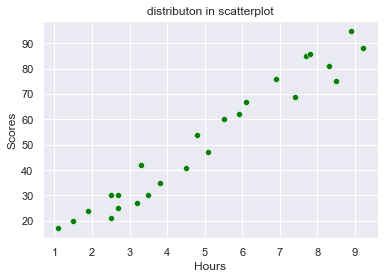

In [8]:
plt.title('distributon in scatterplot')
sns.scatterplot(data = data,x='Hours', y='Scores', color = 'Green')
plt.show()

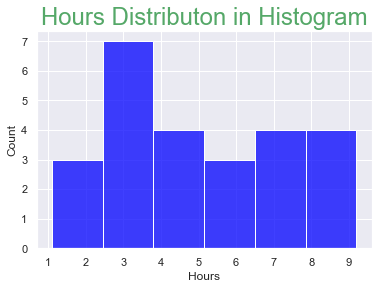

In [9]:
plt.title('Hours Distributon in Histogram',size = 24,color = 'g')
sns.histplot(data = data,x='Hours',color = 'Blue')
plt.show()

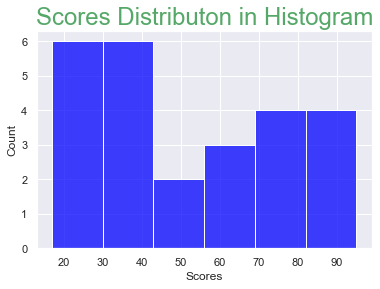

In [10]:
plt.title('Scores Distributon in Histogram',size = 24,color = 'g')
sns.histplot(data = data,x='Scores',color = 'Blue')
plt.show()

### splitinng data in variables

In [11]:
X = data[['Hours']]
Y = data[['Scores']]

In [12]:
x=X.values.reshape(-1,1)
y=Y.values.reshape(-1,1)

## spliting in train and test data

In [13]:
xtrain, xtest,ytrain,ytest=train_test_split(x,y, test_size = 0.2,random_state = 70)

## training model

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(xtrain,ytrain)
print ('.....Training model.....')

.....Training model.....


### checking accuracy of model

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
ypredi = lr.predict(xtest)

In [18]:
accuracy = lr.score(xtest,ytest)
accuracy

0.9395636549738904

## Predicting score of student if he study for 9.25 hr/day

In [19]:
hours=[[9.25, ]]
our_prediction=lr.predict(hours)

print(".....Testing the Model on bases of Given Hours....\n.... HERE WE GET....")

print("For Given Hours = {}".format(hours))
print("Predicted Score = {}".format(our_prediction[0]))

.....Testing the Model on bases of Given Hours....
.... HERE WE GET....
For Given Hours = [[9.25]]
Predicted Score = [94.03556733]


## Evaluating model

In [20]:
from sklearn.metrics import mean_squared_error

#mse= mean squared error

mse =  mean_squared_error(ytest,ypredi)

#rmse= root mean squared error

rmse=np.sqrt(mse)
print(mse)
print(rmse)

42.53268217557492
6.521708531939688


In [21]:
# Creating Observed Score DataFrame 

df=pd.DataFrame(ytest,columns=['Observed Scores '])
df
df['Predicted Scores']=ypredi
df

,Observed Scores,Predicted Scores
0,75,86.467686
1,85,78.395279
2,20,15.834124
3,24,19.870328
4,62,60.232363


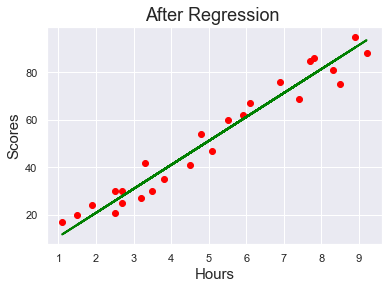

In [22]:
lmodel=lr.coef_*X + lr.intercept_

# Plotting the Regression Graph 

plt.scatter(X,Y, color='red')
plt.plot(X,lmodel, c='green', lw=2)
plt.title('After Regression ', fontsize=18)
plt.xlabel('Hours', fontsize=15)
plt.ylabel('Scores', fontsize=15)
plt.show()